In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

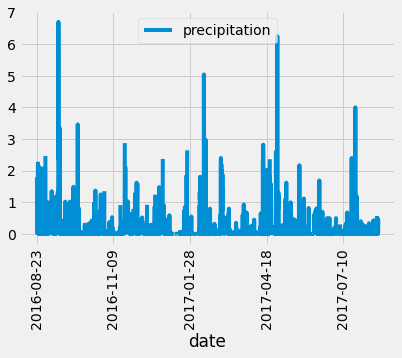

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [12]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

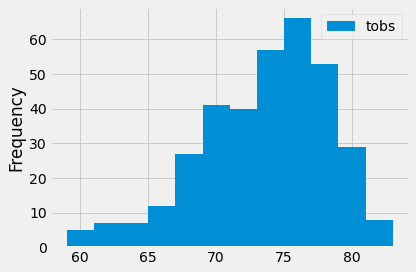

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [15]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [16]:
# Stats for temperature for all stations and years in June 
# Perform a query to retrieve the date, temperture and precipitation scores
resultsjune = []
resultsjune = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(func.extract('month', Measurement.date)== 6).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
junedf = pd.DataFrame(resultsjune, columns=['date','temperature','precipitation'])
junedf.set_index(junedf['date'], inplace=True)
# Sort the dataframe by date
junedf = junedf.sort_index()
junedf.describe()

,temperature,precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [17]:
# Stats for temperature for all stations and years in December 
# Perform a query to retrieve the date, temperature and precipitation scores
resultsdec = []
resultsdec = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(func.extract('month', Measurement.date)== 12).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
decdf = pd.DataFrame(resultsdec, columns=['date','temperature', 'precipitation'])
decdf.set_index(decdf['date'], inplace=True)
# Sort the dataframe by date
decdf = decdf.sort_index()
decdf.describe()

,temperature,precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [18]:
# Comparing Stats 
dectempmax=session.query(func.max(Measurement.tobs).filter(func.extract('month', Measurement.date)== 12)).group_by(func.extract('year',Measurement.date)).all()
junetempmax=session.query(func.max(Measurement.tobs).filter(func.extract('month', Measurement.date)== 6)).group_by(func.extract('year',Measurement.date)).all()
decprcpmax=session.query(func.max(Measurement.prcp).filter(func.extract('month', Measurement.date)== 12)).group_by(func.extract('year',Measurement.date)).all()
juneprcpmax=session.query(func.max(Measurement.prcp).filter(func.extract('month', Measurement.date)== 6)).group_by(func.extract('year',Measurement.date)).all()


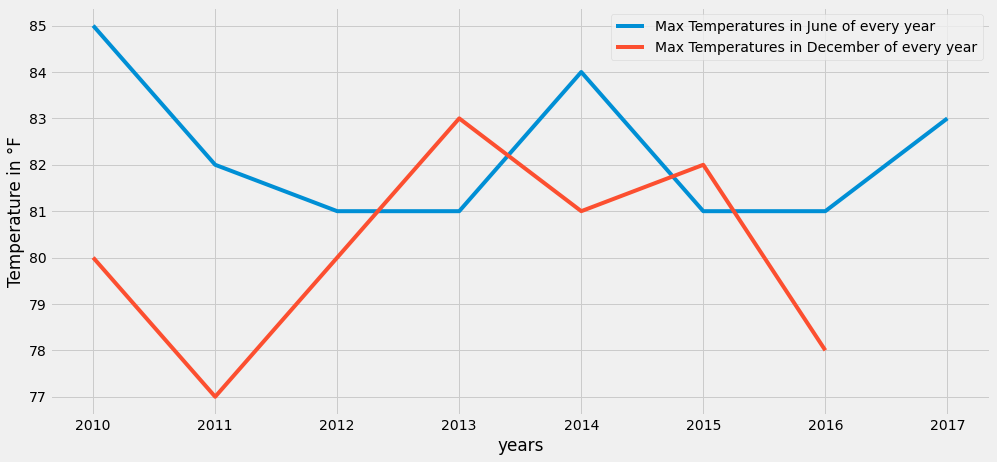

In [21]:
years=[2010,2011,2012,2013,2014,2015,2016,2017]
plt.figure(figsize=(15,7))
plt.plot(years,junetempmax,label="Max Temperatures in June of every year")
plt.plot(years,dectempmax, label="Max Temperatures in December of every year")
plt.xlabel('years')
plt.ylabel('Temperature in °F')
plt.legend()
plt.show()
#plt.tight_layout()

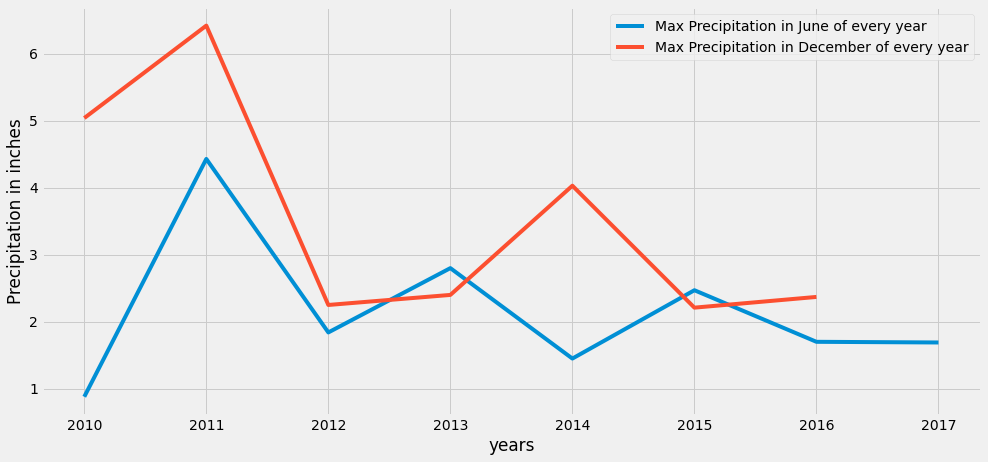

In [22]:
plt.figure(figsize=(15,7))
plt.plot(years,juneprcpmax,label="Max Precipitation in June of every year")
plt.plot(years,decprcpmax,label="Max Precipitation in December of every year")
plt.xlabel('years')
plt.ylabel('Precipitation in inches')
plt.legend()
plt.show()